## Configuration

In [1]:
# Data management
import pandas as pd
import numpy as np

# Graphics
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
import seaborn as sns
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
sns.set_style({'font.family':'monospace'})
import matplotlib.ticker as plticker

## Use case 1. Mesh times

In [2]:
times = pd.read_csv('mesh_times.txt', sep=";", header=None)
times.columns = ["number_nodes","start","end","service_time"]

In [3]:
def is_outlier(s):
    Q1 =s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    return ~s.between(lower_limit, upper_limit)

times = times[~times.groupby('number_nodes')['service_time'].apply(is_outlier)]

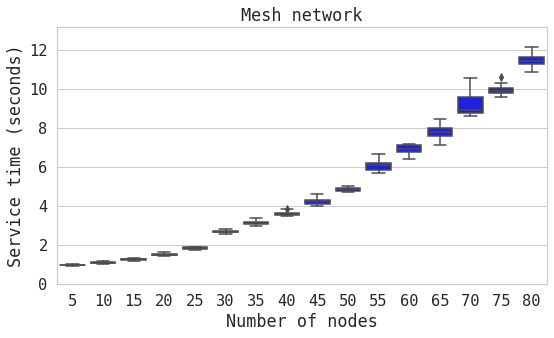

In [4]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax = sns.boxplot(x="number_nodes",
            y="service_time",
            data=times,
            color = 'blue',
            ax=ax)

ax.set_title('Mesh network')
ax.set_ylabel('Service time (seconds)')
ax.set_xlabel('Number of nodes')

ax.set_ylim(0,max(times.service_time)+1)


plt.tight_layout()
#plt.savefig("mesh_network.pdf")

## Use case 2. Mesh resizing times

In [5]:
times = pd.read_csv('mesh_resizing_times.txt', sep=";", header=None)
times.columns = ["arrival_time","ith_node","start","end","service_time"]

In [6]:
def is_outlier(s):
    Q1 =s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    return ~s.between(lower_limit, upper_limit)

times = times[~times.groupby(['arrival_time','ith_node'])['service_time'].apply(is_outlier)]

In [7]:
times = times[times.arrival_time==-1]
times.ith_node = times.ith_node+1
#times = times.replace({-1:'sequential'})

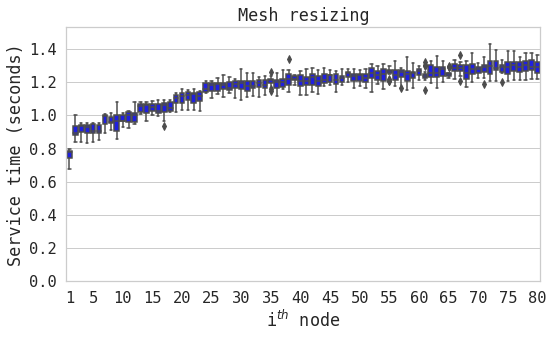

In [8]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax = sns.boxplot(x="ith_node",
            y="service_time",
            data=times,
            color = 'blue',
            ax=ax)

ax.set_title('Mesh resizing')
ax.set_ylabel('Service time (seconds)')
ax.set_xlabel('i$^{th}$ node')

loc = plticker.MultipleLocator(5)
ax.xaxis.set_major_locator(plticker.FixedLocator([0]+list(range(4,80,5))))

ax.set_ylim(0,max(times.service_time)+0.1)

plt.tight_layout()
plt.savefig("mesh_resizing.pdf")

## Use case 3. Star times

In [9]:
times = pd.read_csv('star_times.txt', sep=";", header=None)
times.columns = ["number_nodes","start","end","service_time"]

In [10]:
def is_outlier(s):
    Q1 =s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    return ~s.between(lower_limit, upper_limit)

times = times[~times.groupby('number_nodes')['service_time'].apply(is_outlier)]

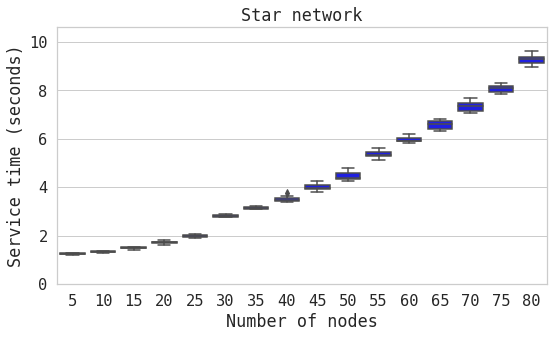

In [11]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax = sns.boxplot(x="number_nodes",
            y="service_time",
            data=times,
            color = 'blue',
            ax=ax)

ax.set_title('Star network')
ax.set_ylabel('Service time (seconds)')
ax.set_xlabel('Number of nodes')

#loc = plticker.MultipleLocator(5)
#ax.xaxis.set_major_locator(loc)

ax.set_ylim(0,max(times.service_time)+1)

plt.tight_layout()
plt.savefig("star_network.pdf")